# Simple Filter Sweep Demo

### Setup
**Import relevant modules:**

In [1]:
import numpy as np
import strauss.stream as strm
import matplotlib.pyplot as plt
from strauss.filters import HPF1, LPF1
import IPython.display as ipd
from strauss.notes import *
from strauss.generator import *

**Sonification length, in seconds**

In [2]:
length = 2.5

**Sample frequency, in Hz *(usually `44100`):***

In [3]:
sampfreq = 44100

### Generating Audio
**Initialise STRAUSS stream**

In [4]:
stream = strm.Stream(length, sampfreq)

**Obtain frequency of note to generate in Hz:**

In [5]:
nfreq = parse_note("B3")
print(f"B3 frequency: {nfreq:.2f} Hz")

B3 frequency: 246.94 Hz


**Generate simple square wave & listen**

*WARNING: Maximally loud signal, please be careful when listening through headphones or powerful speakers*

In [6]:
stream.values = np.where((stream.samples * nfreq / sampfreq) % 2 > 1, -1., 1.)
ipd.Audio(stream.values, rate=sampfreq, autoplay=False)

**Try a chord. Reset the stream and (by default choose`F#add9`, i.e. `F#`, `A#`, `C#` and `G#`):**

*Note: run `stream.reset()` before re-generating each chord to avoid superimposing the previous chord*

In [7]:
stream.reset()
chordname = "F#add9"

**Show frequencies of note to generate in Hz:**

In [8]:
nfreqs = parse_chord(chordname, rootoct=6)
print(nfreqs)

[1479.97769085 1864.65504607 2217.46104781 3322.43758064]


**Generate simple square wave & listen**

In [9]:
gen_chord(stream, chordname, 5)
ipd.Audio(stream.values, rate=sampfreq, autoplay=False)

### Filter sweep using mock data
**Create filter sweep mapping function:**

These mapping functions must be scaled to accept $x \in [0,1]$ and return $y \in [0,1]$

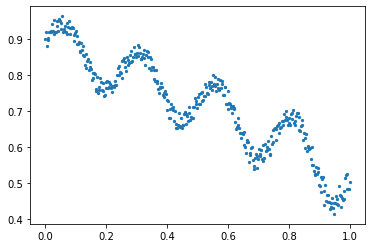

In [11]:
sfunc = lambda x: (0.3-0.5*x+(0.5+np.sin(x*8*np.pi)*0.1+np.random.random(len(x))*0.07))**0.6
plt.scatter(np.linspace(0,1,400), sfunc(np.linspace(0,1,400)), s=5)

**Apply filter sweep & listen:**

In [12]:
stream.bufferize(0.02)
stream.filt_sweep(LPF1, sfunc)
ipd.Audio(stream.values, rate=sampfreq, autoplay=False)